# TP Bagging Boosting Random Forest

Mohamed AL ANI
Le 22/01/2017

### Imports

In [11]:
import numpy as np 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor 
import matplotlib.pyplot as plt 
from sklearn.utils import resample
%matplotlib inline
import seaborn as sns
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

## Bagging

### Question 1 :  Mise en oeuvre du Bagging  


In [2]:
# Create a random dataset 
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel() 
y[::5] += 1 * (0.5 - rng.rand(16))

n_estimators = 10 # L in the text
tree_max_depth = 10
bagging_max_depth = 10 


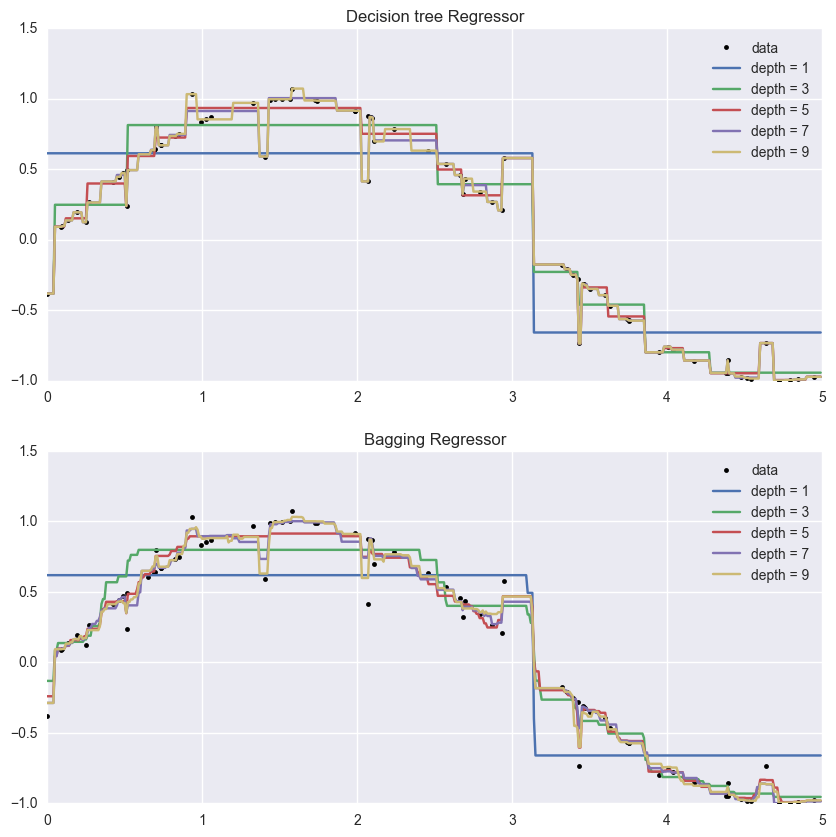

In [3]:
f, axarr = plt.subplots(2, 1, figsize=(10,10))
axarr[0].plot(X, y, '.', c="k", label="data") 
axarr[1].plot(X, y, '.', c="k", label="data") 
axarr[0].set_title("Decision tree Regressor")
axarr[1].set_title("Bagging Regressor")

for depth in range(1,11,2):
    tree = DecisionTreeRegressor(max_depth=depth)
    tree.fit(X, y) # 
    bagging = BaggingRegressor(base_estimator= tree, n_estimators=n_estimators)
    bagging.fit(X, y) # Predict
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    y_tree = tree.predict(X_test)
    y_bagging = bagging.predict(X_test)

    # Plot the results
    axarr[0].plot(X_test, y_tree, label="depth = "+str(depth))

    axarr[1].plot(X_test, y_bagging, label="depth = "+str(depth))

    # TODO add plots for Bagging/Tree
axarr[0].legend(loc=1, numpoints=1)
axarr[1].legend(loc=1, numpoints=1)
plt.show()


### Question 2 : Illustration de l'influence de L et de la profondeur

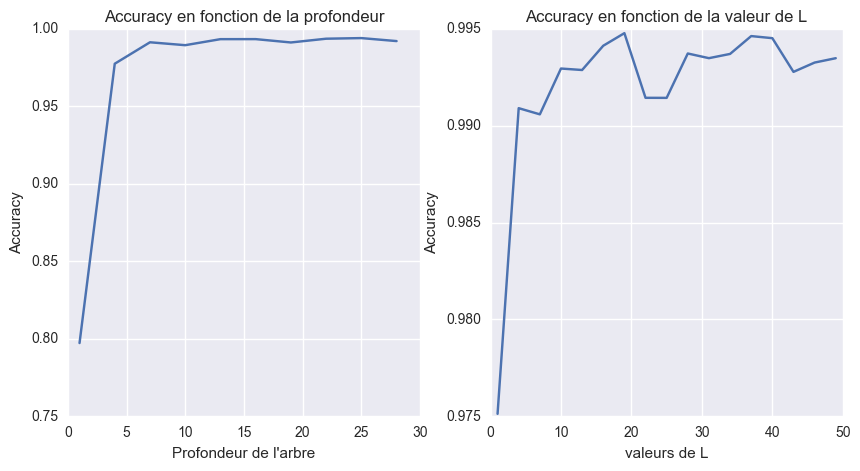

In [4]:
f, axarr2 = plt.subplots(1, 2, figsize=(10,5))

score_depth = []
score_L = []
for depth in range(1,30,3):
    tree = DecisionTreeRegressor(max_depth=depth)
    tree.fit(X, y) # 
    bagging = BaggingRegressor(base_estimator= tree, n_estimators=n_estimators)
    bagging.fit(X, y) # Predict
    score_depth.append(bagging.score(X,y))
for L in range(1,50,3):
    tree = DecisionTreeRegressor(max_depth=10)
    tree.fit(X, y) # 
    bagging = BaggingRegressor(base_estimator= tree, n_estimators=L)
    bagging.fit(X, y) # Predict
    score_L.append(bagging.score(X,y))
    
axarr2[0].plot(range(1,30,3), score_depth)
axarr2[0].set_title("Accuracy en fonction de la profondeur")
axarr2[0].set_xlabel("Profondeur de l'arbre")
axarr2[0].set_ylabel("Accuracy")

axarr2[1].set_title("Accuracy en fonction de la valeur de L")
axarr2[1].plot(range(1,50,3), score_L)
axarr2[1].set_xlabel("valeurs de L")
axarr2[1].set_ylabel("Accuracy")

plt.show()

### Question 3 :  A quoi reconnaît-on que les estimateurs construits par les arbres sont biaisés et que le bagging réduit leur variance? 

Lorsqu'un modèle présente une variance trop élevée, il peut trop coller aux données. Cela signifie que, pour des données différentes, les paramètres du modèle trouvés par l'algorithme d'apprentissage seront différents. Ainsi, il y aura une grande variance dans les paramètres d'apprentissage, selon l'ensemble de test.

### Question 4 :  En jouant sur le niveau de bruit mettez en évidence le sur-apprentissage. 

Accuracy : 0.999974548071


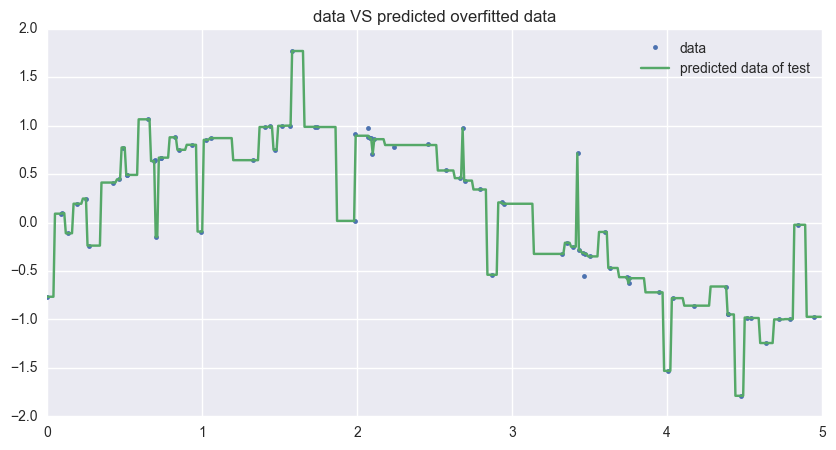

In [5]:
rng = np.random.RandomState(1)
X_of = np.sort(5 * rng.rand(80, 1), axis=0)
y_of = np.sin(X).ravel() 

# On augmente le nombre de points "aberrants" : 
y_of[::3] += 2 * (0.5 - rng.rand(27))

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_of, y_of) 

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_of_tree = tree.predict(X_test)

plt.figure(1,figsize= (10,5))
plt.plot(X_of,y_of, '.', label="data")
plt.plot(X_test,y_of_tree, label="predicted data of test")
plt.title("data VS predicted overfitted data")
plt.legend()
print("Accuracy : "+str(tree.score(X_of,y_of)))

En augmentant le bruit, tout en gardant une tendance sinusoïdale à nos données, on remarque que notre decisionTree a tendance à aller chercher les points aberrants de notre dataset d'apprentissage et ainsi trop coller aux données d'apprentissage, sans considérer la tendance globale de celles-ci. C'est un phénomène de sur-apprentissage.

### Question 5 : Observer qu’on peut réduire ce phénomène en sous-échantillonnant aléatoirement (sans remise) au lieu de prendre des échantillons bootstrap.


Accuracy : 0.999999999823


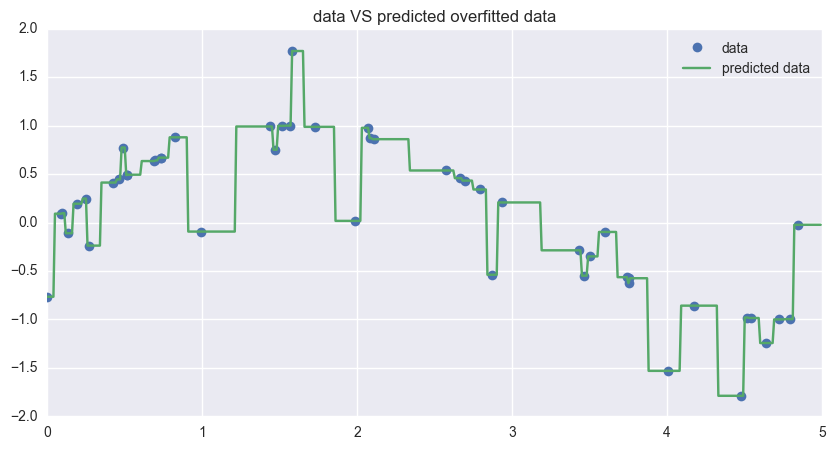

In [6]:
X_resample, y_resample = resample(X_of, y_of, replace = False, n_samples =50)

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_resample, y_resample) 

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

y_res_tree = tree.predict(X_test)

plt.figure(2,figsize= (10,5))
plt.plot(X_resample,y_resample, 'o', label="data")
plt.plot(X_test,y_res_tree, label="predicted data")
plt.title("data VS predicted overfitted data")
plt.legend()
print("Accuracy : "+str(tree.score(X_resample,y_resample)))

## Random Forests

### Question 6 : Évaluez le score par 7-fold cross-validation des Random Forests sur les datasets boston, diabetes, iris et digits. Comparez ces performances avec celles d’un SVM linéaire.

In [7]:
#Regression
boston = datasets.load_boston()
X_boston = boston.data  
y_boston = boston.target

diabetes = datasets.load_diabetes()
X_diabetes = diabetes.data  
y_diabetes = diabetes.target

#Classification 
iris = datasets.load_iris()
X_iris = iris.data  
y_iris = iris.target

digits = datasets.load_digits()
X_digits = digits.data  
y_digits = digits.target

rfc = RandomForestClassifier()
rfr = RandomForestRegressor()
svc = LinearSVC()
svr = SVR()

#iris
print("iris RFC score")
print(np.mean(cross_val_score(rfc, X_iris, y_iris, cv=7)))
print("iris SVM score")
print(np.mean(cross_val_score(svc, X_iris, y_iris, cv=7)))

#digits
print("\ndigits RFC score")
print(np.mean(cross_val_score(rfc, X_digits, y_digits, cv=7)))
print("digits SVM score")
print(np.mean(cross_val_score(svc, X_digits, y_digits, cv=7)))

#diabetes
print("\ndiabetes RFR score")
print(np.mean(cross_val_score(rfr, X_diabetes, y_diabetes, cv=7)))
print("diabetes svm score")
print(np.mean(cross_val_score(svr, X_diabetes, y_diabetes, cv=7)))

#Boston
print("\nBoston RFR score")
print(np.mean(cross_val_score(rfr, X_boston, y_boston, cv=7)))
print("Boston svm score")
print(np.mean(cross_val_score(svr, X_boston, y_boston, cv=7)))

iris RFC score
0.93962585034
iris SVM score
0.952380952381

digits RFC score
0.897056550497
digits SVM score
0.904825418572

diabetes RFR score
0.346531945229
diabetes svm score
-0.0487137209614

Boston RFR score
0.631799184171
Boston svm score
-0.49988414061


### Question 7 : 

In [11]:
from sklearn import preprocessing 

# Parameters
n_estimators = 2 
plot_colors = "bry"
plot_step = 0.02

# Load data 
iris = datasets.load_iris()
X_unscaled, y = iris.data[:, :2], iris.target
# Standardize 
X = preprocessing.scale(X_unscaled)


In [16]:
def plot_boundary(model, n_estimators):
    # RF fitting
    clf = model.fit(X, y)

    # Plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
    np.arange(y_min, y_max, plot_step))


    for tree in model.estimators_:
        Z = np.array([np.argmax(tree.predict_proba(vec.reshape(1,-1))) for vec in np.c_[xx.ravel(), yy.ravel()]])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha=1. / n_estimators, cmap=plt.cm.Paired)


    # Plot the training points
    for i, c in zip(range(3), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1],
                    c=c, label=iris.target_names[i],
        cmap=plt.cm.Paired)
    
    plt.title("Boundary with " + str(n_estimators) + " estimators")
    plt.legend(scatterpoints=1)

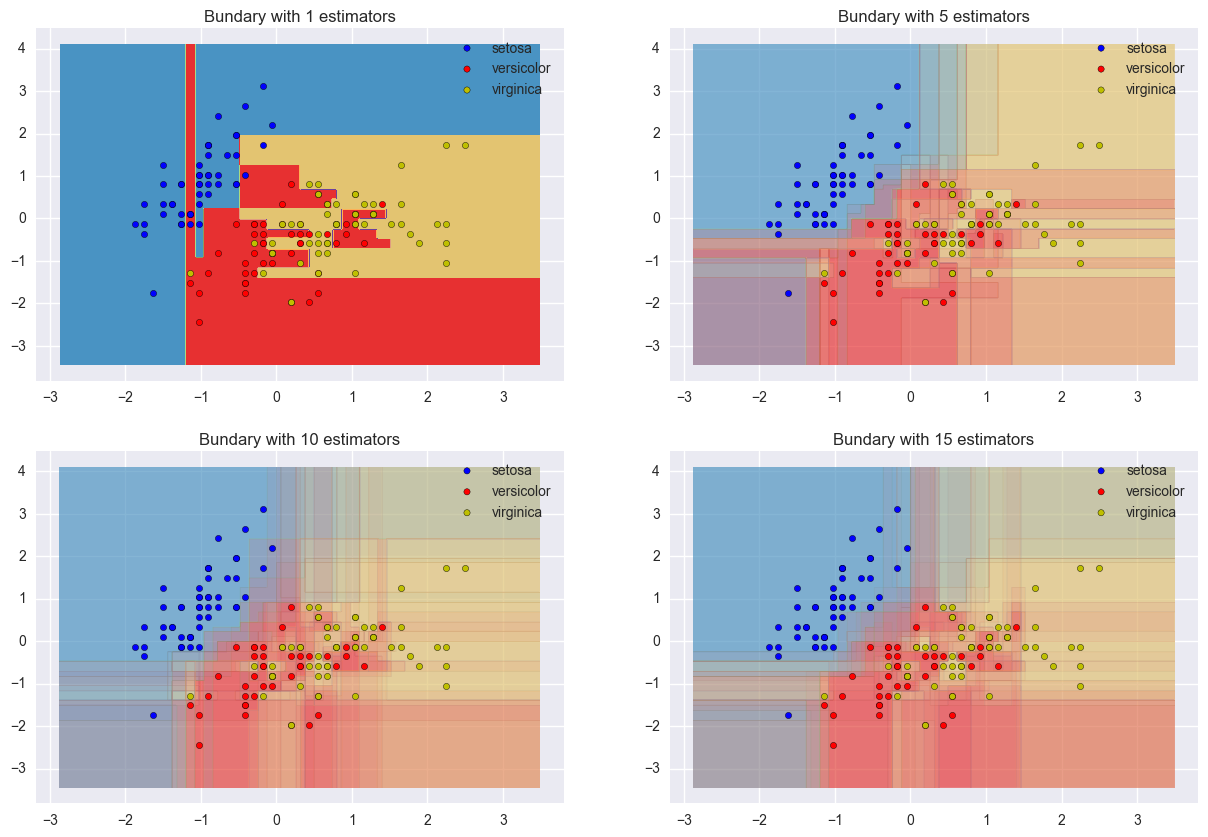

In [9]:
plt.figure(figsize=(15,10))
plt.axis("tight")
plt.subplot(221)
plot_boundary(RandomForestClassifier(n_estimators=1), n_estimators=1)
plt.subplot(222)
plot_boundary(RandomForestClassifier(n_estimators=5), n_estimators=5)
plt.subplot(223)
plot_boundary(RandomForestClassifier(n_estimators=10), n_estimators=10)
plt.subplot(224)
plot_boundary(RandomForestClassifier(n_estimators=15), n_estimators=15)

### Question 8 : 

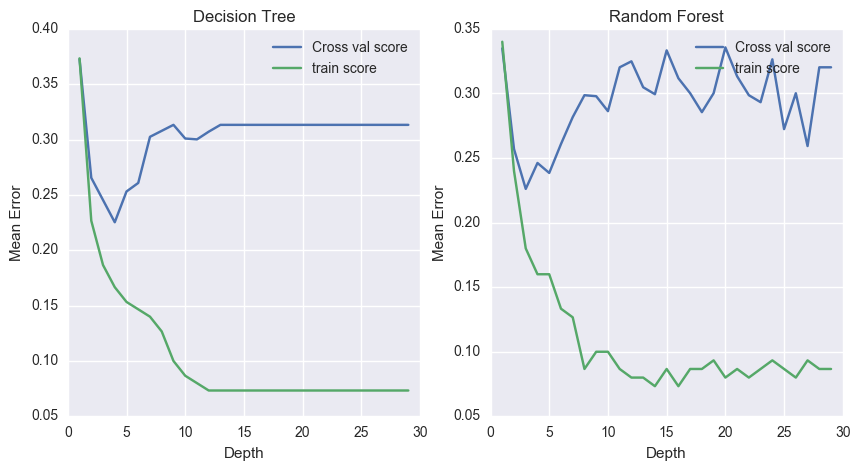

In [29]:
score_RFC_train = []
score_DT_train = []
score_RFC = []
score_DT = []

for depth in range(1,30):
    RFC = RandomForestClassifier(max_depth=depth)
    DT = DecisionTreeClassifier(max_depth=depth, random_state=21)
    score_RFC_train.append(1-RFC.fit(X,y).score(X, y))
    score_DT_train.append(1-DT.fit(X,y).score(X, y))
    score_RFC.append(1-np.mean(cross_val_score(RFC, X, y, cv=6)))
    score_DT.append(1-np.mean(cross_val_score(DT, X, y, cv=6)))

f, axarr3 = plt.subplots(1, 2, figsize=(10,5))
axarr3[0].plot(range(1,30), score_DT, label="Cross val score")
axarr3[0].plot(range(1,30), score_DT_train, label="train score")
axarr3[0].set_title("Decision Tree")
axarr3[0].set_xlabel("Depth")
axarr3[0].set_ylabel("Mean Error")
axarr3[0].legend()

axarr3[1].plot(range(1,30), score_RFC, label="Cross val score")
axarr3[1].plot(range(1,30), score_RFC_train, label="train score")
axarr3[1].set_title("Random Forest")
axarr3[1].set_xlabel("Depth")
axarr3[1].set_ylabel("Mean Error")
axarr3[1].legend()


On constate que pour des random forest de profondeur 27, nous réduisons l'erreur de validation en augmentant l'erreur d'apprentissage. Nous pouvons conclure que les random forest réduisent l'Overfitting

### Question 9 : Démontrez la propriété suivante : Le minimiseur de la fonction $f → R_{exp}(f) = \mathbb{E}[\exp \ (−Y f(x)]$ est atteint en  $f_{\exp}^{*} = \frac{1}{2} \log{\frac{\eta{(x)}}{1-\eta{(x)}}}$
preuve :


soit 
$$ (1) \ \ E[e^{-Y f(x)}/x] = \sum_y e^{-yf(x)} \mathbb{P}(Y=y/x)$$
$$ = \mathbb{P}(y=1/x)e^{-F(x)} + \mathbb{P}(y=-1/x)e^{F(x)}$$

On dérive par rapport à $F(x)$ et on cherche le F maximal tel que :

$$\frac{\partial(1)}{\partial F(x)} = - \eta(x) e^{-F(x)} + (1-\eta(x)) e^{F(x)} = 0$$

$$ \Leftrightarrow \frac{e^{F(x)}}{e^{-F(x)}} = \frac{\eta(x)}{1-\eta(x)}$$

$$ \Leftrightarrow e^{2F(x)} = \frac{\eta(x)}{1-\eta(x)}$$
$$ \Leftrightarrow F^*_{exp}(x)= \frac{1}{2} log(\frac{\eta(x)}{1-\eta(x)})$$

### 10) En déduire que le classifieur de Bayes associé au risque $R_{exp}$ est le même que le classifieur de Bayes associé au risque 0/1, $R_{\rho_{0} }$
Soit le classifieur de Bayes associé au risque 0/1 :
$$ h^{*}_{\rho_{0}} = sign(2\eta(x) -1)$$
Et le classifieur de bayes associé au risque $R_{exp}$ :
$$ h^{*}_{\exp} = sign[ \frac{1}{2} log(\frac{\eta(x)}{1-\eta(x)})]$$
Soit, $\eta(x) = \mathbb{P}(y=1/x) $

Si l'on cherche les valeurs de $\eta(x)$ pour lesquelles s'annule $ h^{*}_{\rho_{0}}$ et  $h^{*}_{\exp}$, on obtient deux fois la valeur $\eta^{*}(x) = \frac{1}{2}$. Sachant que nos deux classifieurs sont croissants, il est évident qu'ils classifient tout deux de façon équivalente les observations, d'une part le label -1 si $\eta(x) < \frac{1}{2}$ et 1 si $\eta(x)> \frac{1}{2}$

### 11) Montrer que la solution du dernier programme d’optimisation est : $c_m = \frac{1}{2}log \left[ \frac{\mathbb{P}_{\omega^{m-1}}(Y=\hat{h}_m(X))}{\mathbb{P}_{\omega^{m-1}}(Y\neq\hat{h}_m(X))} \right]$

On cherche à minimiser la quantité suivante : 
$$ A = \mathbb{E}_{\omega^{m-1}}[exp(-c Y  \hat{h}_m(X))] $$ 
On a : 
$$A =\frac{1}{n}  \mathrel{\sum^{n}_{i=1}}  [\omega_i^{m-1} exp(−c Y_i  \hat{h}_m (X_i))] $$

Or on sait que : 
$$\delta\left[ Y_i=\hat{h}_m(X_i) \right]+ \delta\left[ Y_i\neq \hat{h}_m(X_i) \right]=1$$

Ainsi, on peut écrire et simplifier de la manière suivante : 
$$A =\frac{1}{n}  \mathrel{\sum^{n}_{i=1}}  \omega_i^{m-1}  \delta\left[ Y_i=\hat{h}_m(X_i)\right] exp(−c) +  \frac{1}{n} \mathrel{\sum^{n}_{i=1}}  \omega_i^{m-1}  \delta\left[ Y_i \neq \hat{h}_m(X_i)\right] exp(c) $$

La fonction étant convexe (somme d'exponentielles), on cherche le minimum en appliquant la dérivée partielle en fonction de c : 

$$ \frac{\partial A}{\partial c} = - \frac{1}{n}  \mathrel{\sum^{n}_{i=1}}  \omega_i^{m-1}  \delta\left[ Y_i=\hat{h}_m(X_i)\right] exp(−c) +  \frac{1}{n} \mathrel{\sum^{n}_{i=1}}  \omega_i^{m-1}  \delta\left[ Y_i \neq \hat{h}_m(X_i)\right] exp(c) = 0$$
$$ \Leftrightarrow exp(2c) = \frac{\mathrel{\sum^{n}_{i=1}}  \omega_i^{m-1}  \delta\left[ Y_i=\hat{h}_m(X_i)\right]}{\mathrel{\sum^{n}_{i=1}}  \omega_i^{m-1}  \delta\left[ Y_i \neq \hat{h}_m(X_i)\right]}$$

En utilisant les notations de l'énoncé, on trouve : 

$$ c_m = \frac{1}{2} log \left[ \frac{\mathbb{P}_{\omega^{m-1}}(Y=\hat{h}_m(X)) }{\mathbb{P}_{\omega^{m-1}}(Y \neq \hat{h}_m(X))} \right] $$


### 12) 

On peut procéder par récurrence : 

**Initialisation : **

Selon l'énoncé : $w^0 = \omega^0$

**Hérédité : **

On suppose que : 
$$\forall i\in\mathbb{N}\cap[0;m-1], \; w^i= \omega^i $$ 
Démontrons que : $w^m = \omega^m$

Selon l'énonce, nous avons : 
$$\omega_i^m  \propto \omega_i^{m-1} . exp(-c_m^\star Y_i.\hat{h_m}(X_i))$$
avec
$$ c_m^* = \frac{1}{2} log \left[ \frac{\mathbb{P}_{\omega^{m-1}}(Y=\hat{h}_m(X)) }{\mathbb{P}_{\omega^{m-1}}(Y \neq \hat{h}_m(X))} \right] $$
et donc, 
$$ w_i^m  \propto w_i^{m-1} . exp(2.c_m^{ADA} \mathbb{1}_{Y_i\neq\hat{h_m}(X_i)})$$
avec 
$$ c_m^{ADA} = \frac{1}{2} log \left[ \frac{\mathbb{P}_{w^{m-1}}(Y=\hat{h}_m(X)) }{\mathbb{P}_{w^{m-1}}(Y \neq \hat{h}_m(X))} \right] $$
Or, on a : 
$$\mathbb{P}_{w^{m-1}} = \mathbb{P}_{\omega^{m-1}}$$
d'où : 
$$ c_m^{ADA} =c_m^{\star}$$
Ainsi, on a : 
$$\omega_i^m  =\dfrac{ \omega_i^{m-1} . exp(-c_m^\star Y_i.\hat{h_m}(X_i))}{ \mathrel{\mathop{\Sigma}^{\mathrm{n}}_{\mathrm{j=1}}} \omega_j^{m-1} . exp(-c_m^\star Y_j.\hat{h_m}(X_j))}$$ 
et $$ w_i^m  =\dfrac{ w_i^{m-1} . exp(2c_m^{ADA} \mathbb{1}_{Y_i\neq\hat{h_m}(X_i)})}{\mathrel{\mathop{\Sigma}^{\mathrm{n}}_{\mathrm{j=1}}}   w_j^{m-1} . exp(2c_m^{ADA} \mathbb{1}_{Y_j\neq\hat{h_m}(X_j)})}$$

Or les facteurs $c_m$ sont les mêmes dans les deux expressions précédentes, ainsi, il rest à démontrer que : 
$$ exp(-c_m Y_i.\hat{h_m}(X_i)) \propto  exp(2c_m \mathbb{1}_{Y_j\neq\hat{h_m}(X_j)}) $$ 
avec la notation : $ c_m^\star=c_m^{ADA}=c_m$

Or, on a : $- Y_i.\hat{h_m}(X_i) =  2 \mathbb{1}_{Y_j\neq\hat{h_m}(X_j)} -1$ 

et ceci démontre l'hérédité. La propriété est ainsi démontrée.

### 13) Mettre en œuvre AdaBoost avec des arbres de profondeur 1, puis 2, puis 10, sur le jeu de données digits. On calculera notamment la précision obtenue par 6-fold cross-validation. 

In [9]:
digits = datasets.load_digits()

depths = [1,2,10]
for depth in depths:
    clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=depth))
    print("depth "+str(depth)+" :")
    print("score : "+str(np.mean(cross_val_score(clf, digits.data, digits.target, cv=6))))

depth 1 :
score : 0.263625785558
depth 2 :
score : 0.584692686911
depth 10 :
score : 0.954404741518


### 14) Appliquer AdaBoost sur les données digits découpées en deux échantillons : apprentissage (75%) et test (25%). Tracer les erreurs (0/1) d’apprentissage et de test en fonction du nombre d’itérations. 

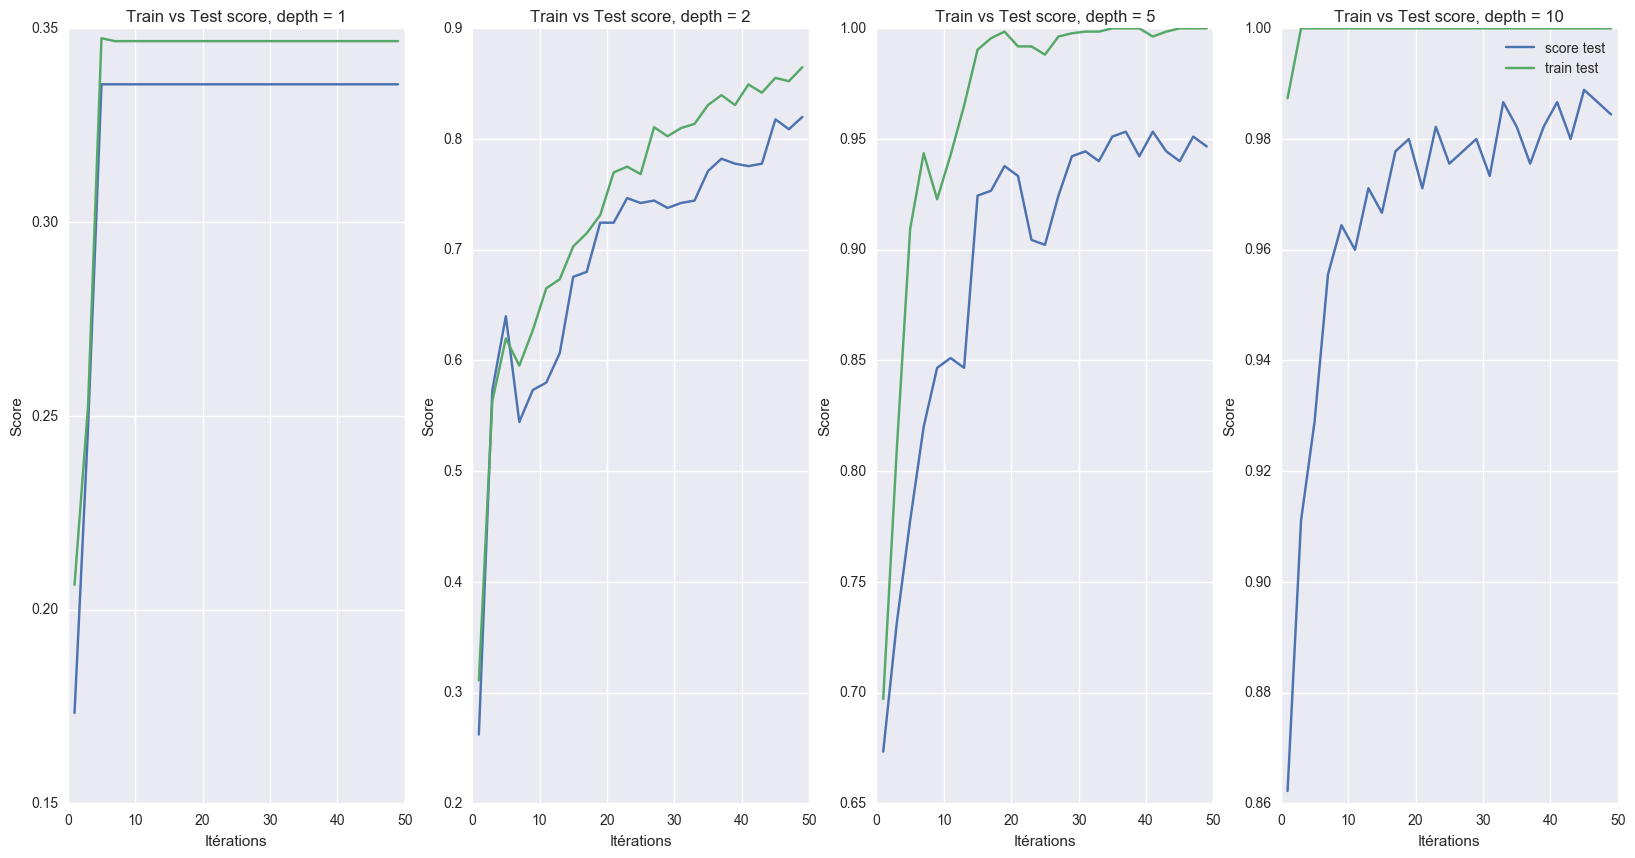

In [39]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=42)

f, axarr = plt.subplots(1, 4, figsize=(20,10))

for i, depth in enumerate([1,2,5,10]):
    score_test = []
    score_train = []
    for n in range(1,50,2):
        clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=depth), n_estimators=n)
        clf.fit(X_train, y_train)
        score_train.append(clf.score(X_train,y_train))
        score_test.append(clf.score(X_test,y_test))
        
    
    axarr[i].plot(range(1,50,2), score_test, label = "score test")
    axarr[i].plot(range(1,50,2), score_train, label = "train test")
    axarr[i].set_xlabel("Itérations")
    axarr[i].set_ylabel("Score")
    axarr[i].set_title("Train vs Test score, depth = "+str(depth))
plt.legend()

### 15) Que remarquez vous? Que se passe-t-il si la profondeur des arbres de classiﬁcation est grande? 

Plus on augmente le nombre d'itérations, plus les deux scores augmentent. Le score sur l'échantillon d'apprentissage converge vers 1 alors que le score sur l'échantillon de validation semble converger vers un score toujours inférieur à celui d'apprentissage.

Plus nous augmentons la profondeur des arbres, plus le score sur l'échantillon d'apprentissage va vite converger vers 1. C'est un phénomène de surapprentissage que nous observons encore uen fois.